## Read future time series data from CSV files 

In [1]:
from IOUtils import *
import numpy as np

ModuleNotFoundError: No module named 'IOUtils'

In [2]:
ref = 'ru1701'
topdir = '../data/ru/'

In [3]:
df = df_reader(ref+'*', topdir).get_tick(raw=True)

## Plot time series

In [4]:
def clean_df(df, cols=['AveragePrice', 'LastPrice', 'AskPrice1', 'AskVolume1', 'BidPrice1', 'BidVolume1']):
    '''Clean the dataframe outside the previous read_df class: 
        - postive prcies quote.
    '''
    for c in cols:
        df = df[df[c]>0]
    
    return df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6218216 entries, 2016-01-15 18:32:29.943000 to 2016-12-30 15:15:05
Data columns (total 37 columns):
InstrumentID       object
Date               int64
TimeStamp          float64
LastPrice          float64
HighPrice          float64
LowPrice           float64
Volume             float64
Turnover           float64
AccVolume          float64
AccTurnover        float64
SettlePrice        float64
OpenInterest       float64
AskPrice1          float64
AskPrice2          float64
AskPrice3          float64
AskPrice4          float64
AskPrice5          float64
AskVolume1         float64
AskVolume2         float64
AskVolume3         float64
AskVolume4         float64
AskVolume5         float64
BidPrice1          float64
BidPrice2          float64
BidPrice3          float64
BidPrice4          float64
BidPrice5          float64
BidVolume1         float64
BidVolume2         float64
BidVolume3         float64
BidVolume4         float64
BidVolume5   

In [6]:
df.head()

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime
Time,,,,,,,,,,,,,,,,,,,,,
2016-01-15 18:32:29.943,ru1701,20160115,1.452854e+12,10005.0,10005.0,10005.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1,0.0,11205.0,8800.0,18:32:29.943
2016-01-15 18:32:29.943,ru1701,20160115,1.452854e+12,10005.0,10005.0,10005.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1,0.0,11205.0,8800.0,18:32:29.943
2016-01-15 18:32:30.500,ru1701,20160115,1.452854e+12,10005.0,10005.0,10005.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1,0.0,11205.0,8800.0,18:32:30.500
2016-01-15 18:32:30.500,ru1701,20160115,1.452854e+12,10005.0,10005.0,10005.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1,0.0,11205.0,8800.0,18:32:30.500
2016-01-15 20:59:00.500,ru1701,20160115,1.452863e+12,10200.0,10200.0,10200.0,0.0,0.0,4.0,408000.0,...,1.0,0.0,0.0,0.0,0.0,-1,10200.0,11205.0,8800.0,20:59:00.500


In [7]:
df.tail()

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime
Time,,,,,,,,,,,,,,,,,,,,,
2016-12-30 14:59:58.500,ru1701,20161230,1.483081e+12,17745.0,17900.0,17390.0,0.0,0.0,5482.0,967492100.0,...,2.0,0.0,0.0,0.0,0.0,-1,17648.0,18650.0,16205.0,14:59:58.500
2016-12-30 14:59:59.000,ru1701,20161230,1.483081e+12,17745.0,17900.0,17390.0,0.0,0.0,5482.0,967492100.0,...,1.0,0.0,0.0,0.0,0.0,-1,17648.0,18650.0,16205.0,14:59:59.000
2016-12-30 14:59:59.500,ru1701,20161230,1.483081e+12,17745.0,17900.0,17390.0,0.0,0.0,5482.0,967492100.0,...,1.0,0.0,0.0,0.0,0.0,-1,17648.0,18650.0,16205.0,14:59:59.500
2016-12-30 15:00:00.500,ru1701,20161230,1.483081e+12,17745.0,17900.0,17390.0,0.0,0.0,5482.0,967492100.0,...,1.0,0.0,0.0,0.0,0.0,-1,17648.0,18650.0,16205.0,15:00:00.500
2016-12-30 15:15:05.000,ru1701,20161230,1.483082e+12,17745.0,17900.0,17390.0,0.0,0.0,5482.0,967492100.0,...,1.0,0.0,0.0,0.0,0.0,-1,17648.0,18650.0,16205.0,15:15:05.000


In [8]:
df_cl = clean_df(df)

In [9]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6201452 entries, 2016-01-15 20:59:00.500000 to 2016-12-30 15:15:05
Data columns (total 37 columns):
InstrumentID       object
Date               int64
TimeStamp          float64
LastPrice          float64
HighPrice          float64
LowPrice           float64
Volume             float64
Turnover           float64
AccVolume          float64
AccTurnover        float64
SettlePrice        float64
OpenInterest       float64
AskPrice1          float64
AskPrice2          float64
AskPrice3          float64
AskPrice4          float64
AskPrice5          float64
AskVolume1         float64
AskVolume2         float64
AskVolume3         float64
AskVolume4         float64
AskVolume5         float64
BidPrice1          float64
BidPrice2          float64
BidPrice3          float64
BidPrice4          float64
BidPrice5          float64
BidVolume1         float64
BidVolume2         float64
BidVolume3         float64
BidVolume4         float64
BidVolume5   

In [10]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
N= len(df_cl)

def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return df_cl.index[thisind].strftime('%Y-%m-%d %H:%M:%S.%f')

def plot_price(df, col='AveragePrice'):
    
    # first we'll do it the default way, with gaps on weekends
    fig, axes = plt.subplots(ncols=2, figsize=(16, 12))
    ax = axes[0]
    ax.plot(df.index, df[col], 'o-')
    ax.set_ylabel(col, fontsize=15)
    ax.set_title("With off-hour gap")
    fig.autofmt_xdate()

    # next we'll write a custom formatter: it is not super-accurate representation, given missing data.
    N = len(df)
    ind = np.arange(N)  # the evenly spaced plot indices

    ax = axes[1]
    ax.plot(ind, df[col], 'o-')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title("Without off-hour gap")
    fig.autofmt_xdate()

    plt.show()

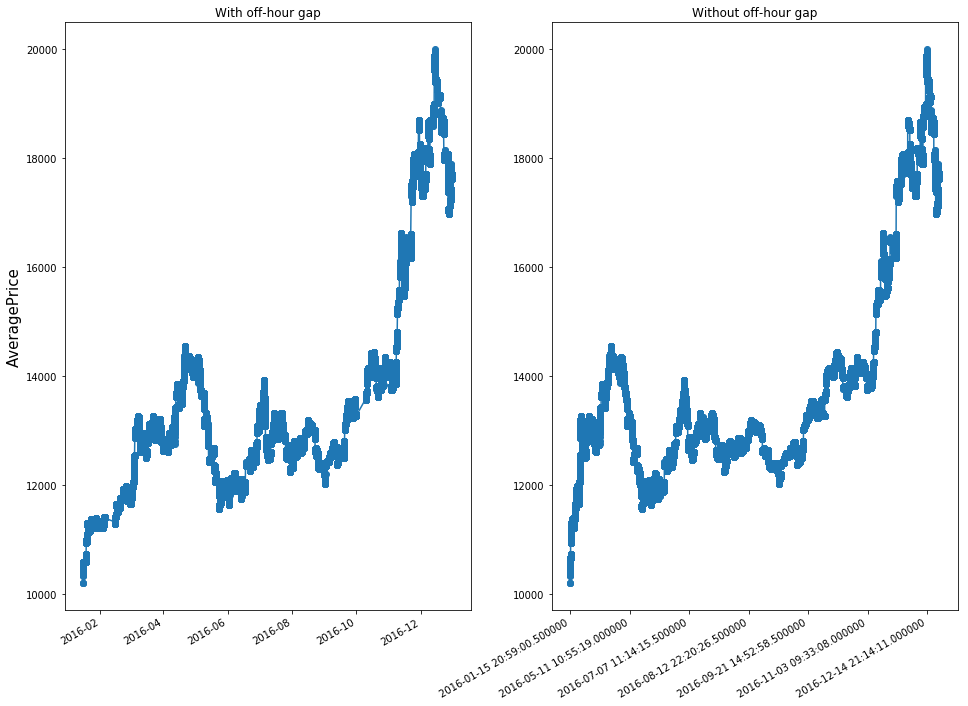

In [11]:
plot_price(df_cl)

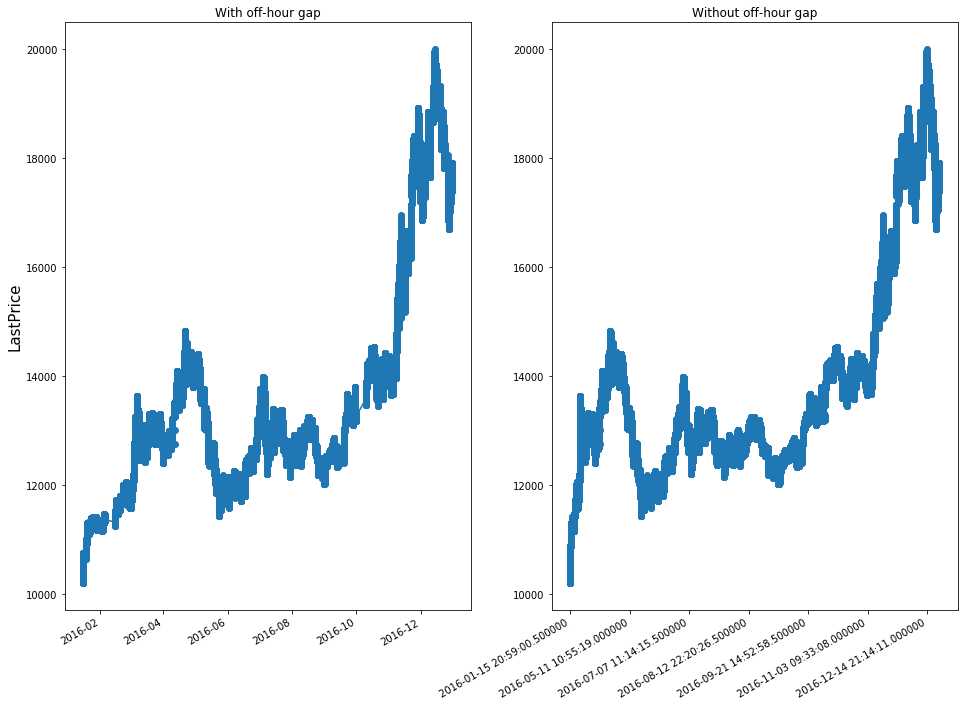

In [12]:
plot_price(df_cl, "LastPrice")

In [13]:
df_cl['return'] = df_cl['LastPrice'].pct_change()

In [14]:
print("Number of valid record = {}".format(len(df_cl)))

Number of valid record = 6201452


In [15]:
print("Number of non-zero pct_change = {}".format(len(df_cl[abs(df_cl['return'])>0.0001])))

Number of non-zero pct_change = 1288541


## Save data in hdf5 format 

In [16]:
store = pd.HDFStore(topdir+ref+'.h5')
store['df'] =  df_cl
store.close()